# Task 2 - Prediction using Unsupervised Machine Learning

### Author: Mustafa Gangardiwala

## Aim: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

### Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
from sklearn.cluster import KMeans

plt.style.use('bmh')

### Reading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Structure of Dataset

In [3]:
df.drop(["Id"],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Preprocessing

In [7]:
X = df.iloc[:, 0:4]
print(X.head())
X = X.values
X.shape

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


(150, 4)

### Finding optimal number of clusters using Elbow method

In [8]:
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(X)
  wcss.append(kmeans_model.inertia_)

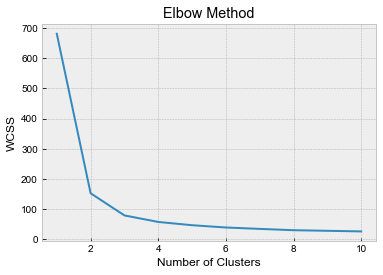

In [9]:
plt.plot(range(1,11), wcss)
sns.set_style('white')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Optimal number of clusters is 3

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Model Building 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
kMeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_pred_kMeans = kMeans.fit_predict(X)
print('Pred:\n', y_pred_kMeans)
print('\n\ninertia: ', kMeans.inertia_, '\n\nclusters centers:\n', kMeans.cluster_centers_)

Pred:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


inertia:  140.965816630747 

clusters centers:
 [[ 1.13597027  0.09659843  0.996271    1.01717187]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]


### Clustering of Species

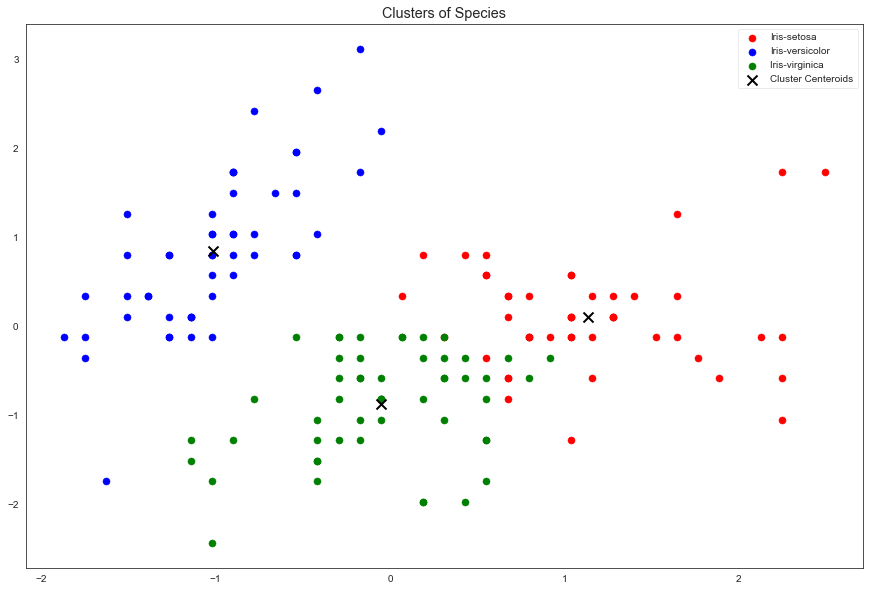

In [13]:
plt.figure(figsize=(15,10))
sns.set_style('white')
plt.scatter(X[y_pred_kMeans == 0, 0], X[y_pred_kMeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred_kMeans == 1, 0], X[y_pred_kMeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_pred_kMeans == 2, 0], X[y_pred_kMeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica ')
plt.scatter(x=kMeans.cluster_centers_[:, 0], y=kMeans.cluster_centers_[:, 1], s=100, c='black', marker='x', label='Cluster Centeroids')
plt.legend()
plt.title('Clusters of Species')
plt.show()